In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

#load dataset.
df = pd.read_csv('dataset.csv')

names = df.iloc[0]
print(names)
# Votar la segunda fila de nombres porque ya existe una cabecera X1, X2, ...
df = df.drop(0)

Unnamed: 0                            ID
X1                             LIMIT_BAL
X2                                   SEX
X3                             EDUCATION
X4                              MARRIAGE
X5                                   AGE
X6                                 PAY_0
X7                                 PAY_2
X8                                 PAY_3
X9                                 PAY_4
X10                                PAY_5
X11                                PAY_6
X12                            BILL_AMT1
X13                            BILL_AMT2
X14                            BILL_AMT3
X15                            BILL_AMT4
X16                            BILL_AMT5
X17                            BILL_AMT6
X18                             PAY_AMT1
X19                             PAY_AMT2
X20                             PAY_AMT3
X21                             PAY_AMT4
X22                             PAY_AMT5
X23                             PAY_AMT6
Y             de

In [2]:
for c in df:
    df[c] = df[c].astype('int64')
df.describe()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [3]:
# Dividir el conjunto en tres: Entrenamiento(24,000), Validacion(3,000), Test (3,000)
# 3,000 es suficiente par dar precision de 0.033% en validacion y test
# Usamos para todos para que comparamos manzanas con manzanas.

X = df.drop('Y', axis=1)
y = df['Y']

from sklearn.model_selection import train_test_split
# Siempre queremos lo mismo conjunto de trainval y test
# Entonces random_state = 77
X_entrenval, X_test, y_entrenval, y_test = train_test_split(X, y, test_size=3000, random_state=77)

In [4]:
# Mejor que permitimos que cambia los conjuntos de train y val
# Entonces por casualidad entre entren y val
X_entren, X_val, y_entren, y_val = train_test_split(X_entrenval, y_entrenval, test_size=3000)
X_entrenval.shape, X_entren.shape, X_val.shape, X_test.shape, y_entrenval.shape, y_entren.shape, y_val.shape, y_test.shape
# Reconstruir pandas dataframe solo de los datos de entrenval.
dftv = pd.concat([X_entrenval, y_entrenval], axis=1)

In [5]:
from sklearn.svm import SVC
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_entren)
scaler



/home/alain/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [6]:
scaler.mean_

array([ 1.50066605e+04,  1.66424737e+05,  1.60554167e+00,  1.85666667e+00,
        1.55070833e+00,  3.54802917e+01, -1.26666667e-02, -1.27041667e-01,
       -1.60583333e-01, -2.10791667e-01, -2.60750000e-01, -2.88791667e-01,
        5.10000160e+04,  4.91652064e+04,  4.68373648e+04,  4.31274498e+04,
        4.01861988e+04,  3.88345108e+04,  5.65347875e+03,  5.84374204e+03,
        5.17796967e+03,  4.81131150e+03,  4.80548221e+03,  5.27295838e+03])

In [7]:
scaler.scale_

array([8.66563664e+03, 1.29293706e+05, 4.88734035e-01, 7.89380911e-01,
       5.21707451e-01, 9.22100112e+00, 1.12657574e+00, 1.20162477e+00,
       1.20022761e+00, 1.17888727e+00, 1.14178637e+00, 1.15587962e+00,
       7.33214409e+04, 7.11603903e+04, 6.91306238e+04, 6.41626333e+04,
       6.06534277e+04, 5.95922739e+04, 1.68281591e+04, 2.31916085e+04,
       1.73103875e+04, 1.60402800e+04, 1.53642004e+04, 1.82446844e+04])

In [8]:
X_scaled = scaler.transform(X_entren)

/home/alain/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [9]:
pd.DataFrame(X_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
count,2.400000e+04,2.400000e+04,2.400000e+04,2.400000e+04,2.400000e+04,2.400000e+04,2.400000e+04,2.400000e+04,2.400000e+04,2.400000e+04,...,2.400000e+04,2.400000e+04,2.400000e+04,2.400000e+04,2.400000e+04,2.400000e+04,2.400000e+04,2.400000e+04,2.400000e+04,2.400000e+04
mean,1.274154e-17,1.100393e-15,-4.202518e-16,4.764707e-18,-2.347567e-16,9.401739e-17,1.371768e-15,-1.958572e-16,-1.751516e-16,-3.624878e-16,...,-4.172588e-18,-5.477563e-17,5.319819e-19,6.607677e-17,-1.047079e-16,2.655133e-16,-1.397308e-16,-2.659331e-16,-1.253585e-15,3.512283e-16
std,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,...,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00
min,-1.731628e+00,-1.209840e+00,-1.239000e+00,-2.352054e+00,-2.972371e+00,-1.570360e+00,-1.764048e+00,-1.558688e+00,-1.532557e+00,-1.517709e+00,...,-2.952402e+00,-3.321676e+00,-2.003517e+00,-4.159692e+00,-3.359535e-01,-2.519766e-01,-2.991250e-01,-2.999518e-01,-3.127714e-01,-2.890134e-01
25%,-8.665157e-01,-9.004672e-01,-1.239000e+00,-1.085239e+00,-1.055588e+00,-8.112234e-01,-8.764021e-01,-7.264816e-01,-6.993812e-01,-6.694519e-01,...,-6.378304e-01,-6.361561e-01,-6.332733e-01,-6.308286e-01,-2.765293e-01,-2.153254e-01,-2.765952e-01,-2.815762e-01,-2.964510e-01,-2.835324e-01
50%,2.289445e-03,-2.043776e-01,8.071022e-01,1.815769e-01,8.611947e-01,-1.605348e-01,1.124351e-02,1.057249e-01,1.337941e-01,1.788056e-01,...,-3.860643e-01,-3.749838e-01,-3.637585e-01,-3.646699e-01,-2.111627e-01,-1.653504e-01,-1.951412e-01,-2.064373e-01,-2.151418e-01,-2.067977e-01
75%,8.668249e-01,5.690553e-01,8.071022e-01,1.815769e-01,8.611947e-01,5.986019e-01,1.124351e-02,1.057249e-01,1.337941e-01,1.788056e-01,...,1.874804e-01,1.685179e-01,1.608285e-01,1.714272e-01,-3.863933e-02,-3.638135e-02,-3.954098e-02,-5.057963e-02,-5.138453e-02,-6.977147e-02
max,1.730206e+00,6.447145e+00,8.071022e-01,5.248839e+00,2.777978e+00,4.719629e+00,7.112408e+00,6.763377e+00,6.799196e+00,6.964866e+00,...,2.339414e+01,1.322356e+01,1.462382e+01,1.548572e+01,5.157418e+01,7.237166e+01,5.146401e+01,3.841508e+01,2.744845e+01,2.868743e+01


In [21]:
svcModel = SVC(kernel='rbf', C=1, gamma=50, probability=True)
svcModel.fit(X_scaled, y_entren)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=50, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [22]:
svcModel.score(X_scaled, y_entren)

0.9990833333333333

In [23]:
# Función de costo y exatitud.
import collections
from sklearn import metrics


def custom_cost(modelo, X, y, printout=True):
    predicciones = modelo.predict(X)
    return _custom_cost(y, predicciones, printout)
    
def _custom_cost(y, predicciones, printout=True):

    accuracy = metrics.accuracy_score(y, predicciones)
    precision = metrics.precision_score(y, predicciones)
    recall = metrics.recall_score(y, predicciones)

    matriz_confusion = metrics.confusion_matrix(y, predicciones)
    # Mapping from http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
    # 0 is the negative category.
    # rows are the actual values.
    # columns are the predicted values.
    # So it is just the opposite orientation of +/-.
    TN = matriz_confusion[0,0]
    FN = matriz_confusion[1,0]
    FP = matriz_confusion[0,1]
    TP = matriz_confusion[1,1]
    # From this we can calculate the other measures.
    # If cost for each state, we can calculate overall cost.
    # Coefficients de costo.
    cTP = -1; cFN = 5; cFP = 1; cTN = 0
    todo_costo = cFN*FN + cFP*FP + cTN*TN + cTP*TP
    cost = todo_costo/len(y)
    
    if printout:
        print('Exactitud:    ',  accuracy)
        print('Precisión:    ', precision)
        print('Exhaustividad:', recall)
        print('Costo por cliente:', cost)
            
    quality = collections.namedtuple('Quality', 'accuracy, precision, recall, cost')
    return quality(accuracy, precision, recall, cost)

In [24]:
# define the function to estimate empirical probabilities.
# returns predicted probability (trimmed by n on both sides)
# and empirical probability calculated by Yeh's SMM method.
import numpy as np
def getPQprobs(y, y_prob, n=50):
    frame = { 'y': y, 'y_prob': y_prob } 
    df = pd.DataFrame(frame)
    df = df.sort_values(['y_prob'])
    y = df.y
    y_prob = df.y_prob
    prob_smm = []
    denom = 2*n + 1
    for i in range(n, len(y)-n):
        p = y[i-n:i+n+1].sum()/denom
        prob_smm.append(p)
    prob_pred = np.array(y_prob[n:len(y)-n])
    prob_smm = np.array(prob_smm)
    return (prob_pred, prob_smm)

# plot actual versus predicted probabilities sorted ascending on predicted.
import matplotlib.pyplot as plt
%matplotlib inline
def plotPQ(prob_emp, prob_pred):
    plt.rcParams.update({'font.size': 9})
    plt.plot(prob_pred, prob_emp, label= ("Empirical x Prediccion") )
    plt.xlabel("Prob Predicción")
    plt.ylabel("Prob Empirical")
    from scipy.stats import entropy
    kld = entropy(pk=prob_emp, qk=prob_pred)
    from scipy.spatial import distance
    jsd = distance.jensenshannon(prob_emp, prob_pred)
    plt.title(("Curva Probabilidades (KL div = %.4f, JS div = %.4f)" % (kld, jsd)))

# Combine the procedures
def mostrarPQ(y, y_prob):
    prob_pred, prob_smm = getPQprobs(y, y_prob)
    plotPQ(prob_smm, prob_pred)

/home/alain/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


linea base

 e.1 Con el clasificador SVM
-----------------------------------
Score Entrenamiento: 0.9990833333333333
Score Validacion: 0.785

Entrenamiento
Exactitud:     0.9990833333333333
Precisión:     1.0
Exhaustividad: 0.9958978183852322
Costo por cliente: -0.21795833333333334

Validacion
Exactitud:     0.785
Precisión:     0.0
Exhaustividad: 0.0
Costo por cliente: 1.0736666666666668



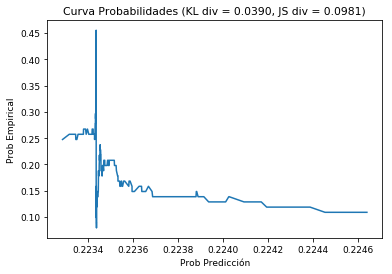

In [25]:
Xval_scaled = scaler.transform(X_val)

svcTrainScore = svcModel.score(X_scaled,y_entren)
svcValScore = svcModel.score(Xval_scaled,y_val)

print('linea base')
print('\n e.1 Con el clasificador SVM')
print('-----------------------------------')
print('Score Entrenamiento: ' + str(svcTrainScore))
print('Score Validacion: ' + str(svcValScore))

#función de costo
print('\nEntrenamiento')
custom_cost(svcModel, X_scaled, y_entren)
print('\nValidacion')
custom_cost(svcModel, Xval_scaled, y_val)
print()
#mostrar probabilidades empiricales vs predicción
y_val_prob = svcModel.predict_proba(Xval_scaled)[:,1] # Probability of category +1
mostrarPQ(y_val, y_val_prob)